In [16]:
from river.datasets import synth
from river import tree, stream, metrics, drift
from itertools import chain
from itertools import cycle
import random

In [17]:
# # Define different Hyperplane generators with different seeds
# seed = 1
# random_seed_generator = random.Random(seed)


# n_features = 3
# gen1 = synth.Hyperplane(seed=random_seed_generator.randint(0,200000), n_features=n_features)
# gen2 = synth.Hyperplane(seed=random_seed_generator.randint(0,200000), n_features=n_features)
# gen3 = synth.Hyperplane(seed=random_seed_generator.randint(0,200000), n_features=n_features)
# gen4 = synth.Hyperplane(seed=random_seed_generator.randint(0,200000), n_features=n_features)
# gen5 = synth.Hyperplane(seed=random_seed_generator.randint(0,200000), n_features=n_features)
# gen6 = synth.RandomRBF(seed_model = random_seed_generator.randint(0,200000), seed_sample=random_seed_generator.randint(0,200000), n_classes=2, n_features=n_features, n_centroids=20)
# gen7= synth.RandomTree(seed_tree = random_seed_generator.randint(0,200000), seed_sample=random_seed_generator.randint(0,200000), n_classes=2,
#                            n_num_features=n_features, n_cat_features=0,
#                            n_categories_per_feature=2, max_tree_depth=6,
#                            first_leaf_level=3, fraction_leaves_per_level=0.15)
# gen8= synth.RandomTree(seed_tree = random_seed_generator.randint(0,200000), seed_sample=random_seed_generator.randint(0,200000), n_classes=2,
#                            n_num_features=n_features, n_cat_features=0,
#                            n_categories_per_feature=2, max_tree_depth=6,
#                            first_leaf_level=3, fraction_leaves_per_level=0.15)

# list_of_generators = [gen8, gen2, gen3, gen7]

# samples_per_generator = [20000 for x in list_of_generators]

# chained_stream = create_complex_generator(
#     generators=list_of_generators,
#     samples_per_generator=samples_per_generator
# )

# all_samples_number = sum(samples_per_generator)

In [18]:
from helper_lib import take_tests_for_streams_on_tree, prefix_sum, take_tests_for_streams_on_given_model, tree_model_factory
from helper_lib import take_tests_for_streams_on_given_model_experimental, ARF_model_factory
from complex_generators import create_complex_generator, generate_cyclical_drift_stream,generate_random_chain_stream


metric = metrics.ClassificationReport()


In [19]:
number_of_streams = 2
number_of_features = 5
samples_per_generator = 20000
samples_per_generator_list = [samples_per_generator for x in range(0,number_of_streams)]
all_samples_number = sum(samples_per_generator_list)
chained_generator,drift_widths = generate_random_chain_stream(number_of_streams=number_of_streams,
                                                  number_of_features=number_of_features,
                                                  samples_per_generator=samples_per_generator_list,
                                                  )
true_drift_points = prefix_sum(samples_per_generator_list)

[Synthetic data generator

    Name  Hyperplane           
    Task  Binary classification
 Samples  ∞                    
Features  5                    
 Outputs  1                    
 Classes  2                    
  Sparse  False                

Configuration
-------------
            seed  160372
      n_features  5     
n_drift_features  0     
      mag_change  0.0   
noise_percentage  0     
           sigma  0     , Synthetic data generator

    Name  Hyperplane           
    Task  Binary classification
 Samples  ∞                    
Features  5                    
 Outputs  1                    
 Classes  2                    
  Sparse  False                

Configuration
-------------
            seed  121242
      n_features  5     
n_drift_features  0     
      mag_change  0.0   
noise_percentage  0     
           sigma  0     ]


In [20]:
# detected_change_points, accuracys = take_tests_for_streams_on_tree(chained_generator,all_samples_number,metric)

In [21]:
# from helper_lib import visualize_results
# visualize_results(detected_change_points, true_drift_points,drift_widths , accuracys)

In [22]:
def detector_factory():
    return drift.ADWIN(grace_period=5, delta=0.002,min_window_length=500,max_buckets=30)

In [23]:

generator_pool_size = 3
number_of_streams = 6
number_of_features = 5
samples_per_generator = 20000
samples_per_generator_list = [samples_per_generator for x in range(0,number_of_streams)]
all_samples_number = sum(samples_per_generator_list)
chained_generator,drift_widths = generate_cyclical_drift_stream(
    generator_pool_size=generator_pool_size,
    number_of_generators=number_of_streams,
    number_of_features=number_of_features,
    samples_per_generator=samples_per_generator_list,
    seed=2
)
true_drift_points = prefix_sum(samples_per_generator_list)
metric = metrics.ClassificationReport()
# tree_model_factory = tree_model_factory
detected_change_points, accuracys = take_tests_for_streams_on_given_model_experimental(chained_generator,all_samples_number,metric,adwin_factory=detector_factory,model_factory=tree_model_factory,number_of_detectors=50)

[Synthetic data generator

    Name  Hyperplane           
    Task  Binary classification
 Samples  ∞                    
Features  5                    
 Outputs  1                    
 Classes  2                    
  Sparse  False                

Configuration
-------------
            seed  14824
      n_features  5    
n_drift_features  0    
      mag_change  0.0  
noise_percentage  0    
           sigma  0    , Synthetic data generator

    Name  Hyperplane           
    Task  Binary classification
 Samples  ∞                    
Features  5                    
 Outputs  1                    
 Classes  2                    
  Sparse  False                

Configuration
-------------
            seed  24008
      n_features  5    
n_drift_features  0    
      mag_change  0.0  
noise_percentage  0    
           sigma  0    , Synthetic data generator

    Name  Hyperplane           
    Task  Binary classification
 Samples  ∞                    
Features  5                  

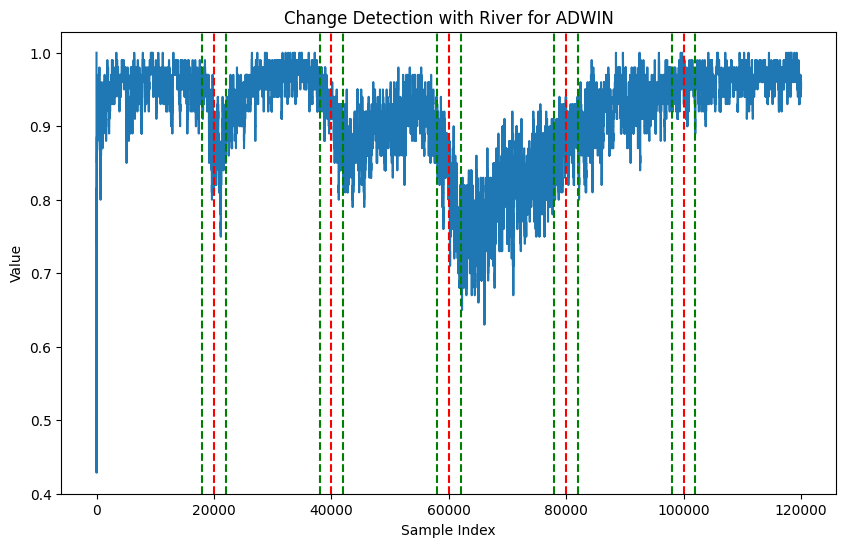

In [24]:
from helper_lib import visualize_results

visualize_results({"ADWIN":[]}, true_drift_points,drift_widths, accuracys)

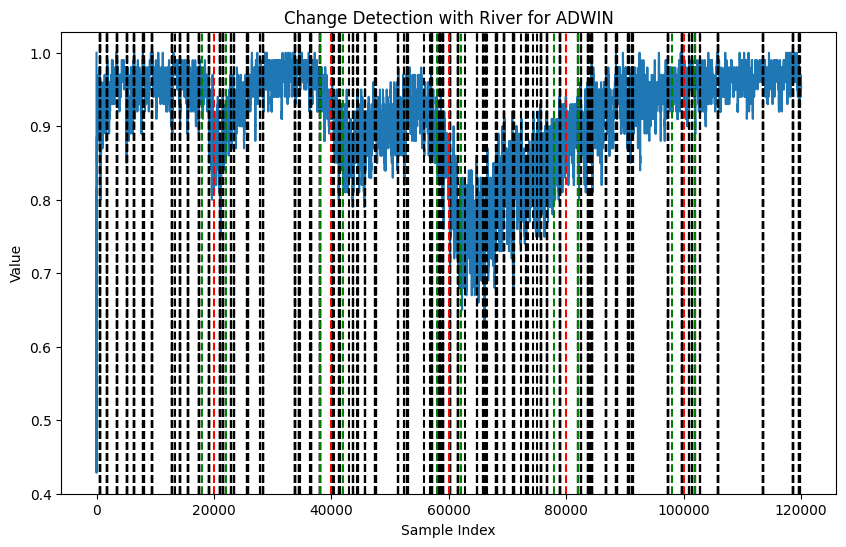

In [25]:
visualize_results(detected_change_points, true_drift_points,drift_widths, accuracys)

In [26]:
from helper_lib import calculate_drift_intervals

In [27]:
from helper_lib import group_close_numbers, transform_drift_detections_into_intervals

In [28]:
group_close_numbers(detected_change_points['ADWIN'],100)

[[656, 657, 658, 658, 659, 660, 661, 661, 661, 662],
 [1796, 1803, 1823, 1823, 1824, 1825, 1825, 1826, 1826, 1827],
 [3493, 3494, 3494, 3495, 3496, 3496, 3497, 3497, 3499, 3504],
 [5111, 5111, 5112, 5113, 5114, 5121, 5121, 5122, 5122, 5123],
 [6391, 6391, 6392, 6393, 6394, 6401, 6401, 6415, 6415, 6422],
 [7983, 7983, 7984, 7986, 7986, 7987, 8007, 8008, 8010, 8011],
 [9386, 9387, 9387, 9388, 9389, 9389, 9390, 9391, 9391, 9392],
 [12791, 12823, 12824, 12825, 12826, 12826, 12827, 12828, 12828, 12828],
 [13360],
 [14195, 14196, 14197, 14197, 14197, 14198, 14199, 14199, 14200, 14201],
 [15527, 15528, 15528, 15529, 15529, 15530, 15531, 15531, 15532, 15533],
 [17384, 17385, 17385, 17386, 17387, 17400, 17401, 17402, 17402, 17403],
 [19194, 19194, 19195, 19199, 19199, 19222, 19223, 19223, 19228, 19228],
 [21016, 21017, 21020, 21020, 21020, 21021, 21022, 21024, 21025, 21025],
 [21478, 21479, 21480, 21483, 21484, 21512, 21513, 21513, 21514, 21515],
 [22822, 22913, 22913, 22917, 22924],
 [23336, 2

In [29]:
transform_drift_detections_into_intervals(detected_change_points['ADWIN'],50)

[(656, 662),
 (1796, 1827),
 (3493, 3504),
 (5111, 5123),
 (6391, 6422),
 (7983, 8011),
 (9386, 9392),
 (12791, 12828),
 (14195, 14201),
 (15527, 15533),
 (17384, 17403),
 (19194, 19228),
 (21016, 21025),
 (21478, 21515),
 (23336, 23358),
 (25548, 25624),
 (25724, 25730),
 (28361, 28384),
 (33767, 33798),
 (34549, 34586),
 (36427, 36452),
 (38050, 38056),
 (40029, 40047),
 (43696, 43748),
 (45713, 45717),
 (47351, 47395),
 (51401, 51412),
 (52897, 52949),
 (57176, 57180),
 (58423, 58482),
 (59024, 59029),
 (60166, 60203),
 (61589, 61613),
 (68060, 68079),
 (69437, 69481),
 (71007, 71026),
 (75721, 75731),
 (76713, 76737),
 (78960, 78979),
 (83721, 83730),
 (84322, 84328),
 (86755, 86823),
 (88461, 88469),
 (88566, 88594),
 (91269, 91336),
 (97348, 97409),
 (99706, 99718),
 (101471, 101488),
 (105781, 105799),
 (113500, 113505),
 (118600, 118606),
 (119716, 119740)]

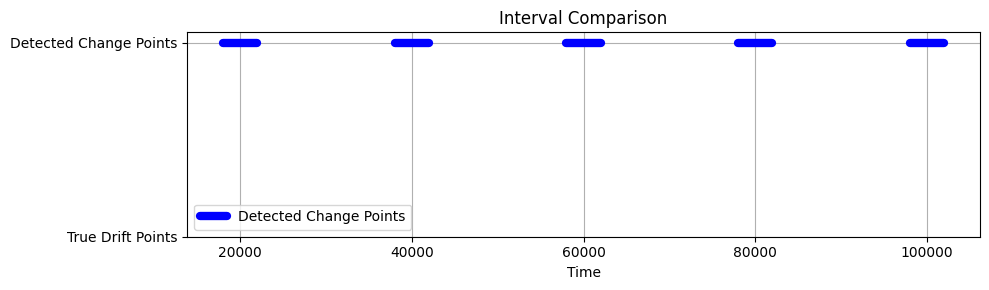

In [39]:
from helper_lib import visualize_interval_differences, calculate_drift_intervals

intervals_a = calculate_drift_intervals(true_drift_points,drift_widths)
intervals_b = transform_drift_detections_into_intervals(detected_change_points['ADWIN'],500,20)
visualize_interval_differences(intervals_a, intervals_b, labels=('Detected Change Points', 'True Drift Points'))